# SIR model

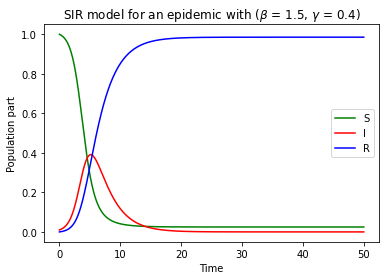

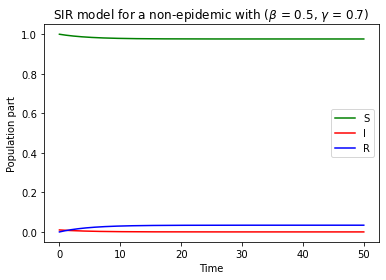

In [407]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.signal import find_peaks


t = np.linspace(0, 50, num = 5000)

beta = 1.5
gamma = 0.4

beta_no_epi = 0.5
gamma_no_epi = 0.7

# initial conditions for S I R
initial = [1, 0.01, 0]

def sim(initial, t, beta, gamma):
    S = initial[0]
    I = initial[1]
    R = initial[2]

    dSdt = -beta * I * S 
    dIdt = beta * I * S - gamma * I 
    dRdt = gamma * I 

    return ([dSdt, dIdt, dRdt])

y = odeint(sim, initial, t, args=(beta,gamma))

plt.plot(t,y[:,0],'g-', label = 'S')
plt.plot(t,y[:,1],'r-', label = 'I')
plt.plot(t,y[:,2],'b-', label = 'R')
plt.xlabel('Time')
plt.ylabel('Population part')
plt.title(r'SIR model for an epidemic with ($\beta$ = %.1f, $\gamma$ = %.1f)' %(beta,gamma))
plt.legend()
plt.savefig('downloads/BasicSIRepi.png')
plt.show()


y = odeint(sim, initial, t, args=(beta_no_epi,gamma_no_epi))

plt.plot(t,y[:,0],'g-', label = 'S')
plt.plot(t,y[:,1],'r-', label = 'I')
plt.plot(t,y[:,2],'b-', label = 'R')
plt.xlabel('Time')
plt.ylabel('Population part')
plt.title(r'SIR model for a non-epidemic with ($\beta$ = %.1f, $\gamma$ = %.1f)' %(beta_no_epi,gamma_no_epi))
plt.legend()
plt.savefig('downloads/BasicSIRnoepi.png')
plt.show()

# Problem 1.1 phase space 

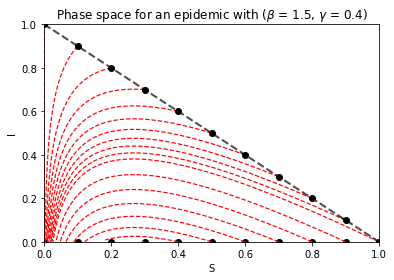

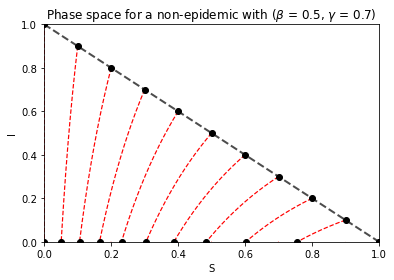

In [408]:
t = np.linspace(0, 50, num = 5000)

def phase_space(beta,gamma):
    #  plot a phase space for S and I, varying S0 conditions and assuming there are always some infected left.   
    for S0 in np.arange(0,1.1 ,0.1):
        R0 = 0
        I0 = 1 - S0 - R0
        initial = [S0, I0, R0]
        y = odeint(sim, initial, t, args=(beta,gamma))
        plt.plot(y[:,0],y[:,1],'r--', linewidth = 1.2, alpha = 1)
        plt.plot(y[:,0][0], y[:,1][0],'o', color = 'black')
        if beta > gamma:
            plt.plot(y[:,0][0], 0,'o', color = 'black')
        else:
            plt.plot(y[:,0][-1], y[:,1][-1],'o', color = 'black')
         
        I0 = 0.0001
        R0 = 1 - S0 - I0
        initial = [S0, I0, R0]
        y = odeint(sim, initial, t, args=(beta,gamma))
        plt.plot(y[:,0],y[:,1],'r--', linewidth = 1.2, alpha = 1)


    plt.plot([0,1],[1,0],'--', color = 'black', linewidth = 2, alpha = 0.7)
    plt.plot()
    plt.xlabel('S')
    plt.ylabel('I')
    plt.xlim(0,1)
    plt.ylim(0,1)
    if beta > gamma:
        plt.title(r'Phase space for an epidemic with ($\beta$ = %.1f, $\gamma$ = %.1f)' %(beta,gamma))
        plt.savefig('downloads/basicphaseepi.png')
    else:
        plt.title(r'Phase space for a non-epidemic with ($\beta$ = %.1f, $\gamma$ = %.1f)' %(beta,gamma))
        plt.savefig('downloads/basicphasenoepi.png')

    plt.show()

# phase spaces for an epidemic and a non-epidemic respectfully
phase_space(beta,gamma)
phase_space(beta_no_epi,gamma_no_epi)



# Problem 1.2 Fit data

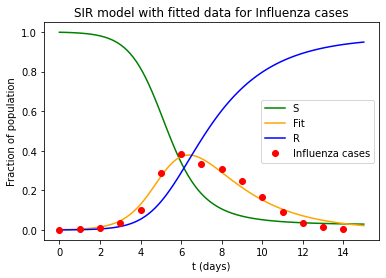

In [409]:
# Data for influenza outbreak
I_influenza = np.array([1,3,8,28,75,221,291,255,235,190,125,70,28,12,5])/763
t_list = list(range(15))
initials = np.array([762,1,0])/763

def fit(t,beta,gamma):
    '''
    returns the fit for infected
    '''
    y = odeint(sim, initials, t, args=(beta,gamma))
    return y[:,1]

tlist_2 = np.linspace(0, 15, 100)
coefficient, covariant = curve_fit(fit, t_list, I_influenza)

# beta and gamma obtained from the fitted data
beta_fit = coefficient[0]
gamma_fit = coefficient[1]

fit_data = fit(tlist_2, beta_fit, gamma_fit)


# plot SIR model with fit, and data from the influenza outbreak
S = odeint(sim, initials, tlist_2, args=(beta_fit,gamma_fit))[:,0]
R = odeint(sim, initials, tlist_2, args=(beta_fit,gamma_fit))[:,2]

plt.plot(tlist_2, S, label = 'S', color = 'green')
plt.plot(tlist_2, fit_data, label = 'Fit', color = 'orange')
plt.plot(tlist_2, R, label = 'R', color = 'blue')
plt.plot(t_list, I_influenza,'o', label = 'Influenza cases', color = 'red')
plt.xlabel('t (days)')
plt.ylabel('Fraction of population')
plt.title('SIR model with fitted data for Influenza cases')
plt.legend()
plt.savefig('downloads/influenzafit.png')
plt.show()


# Problem 1.3 propose vaccination plan

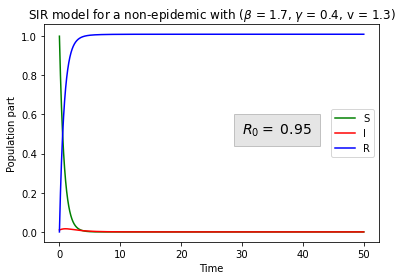

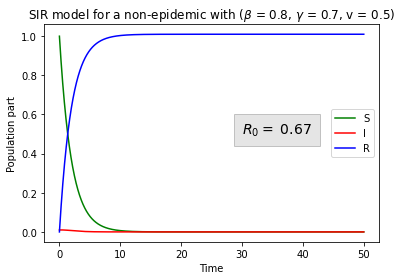

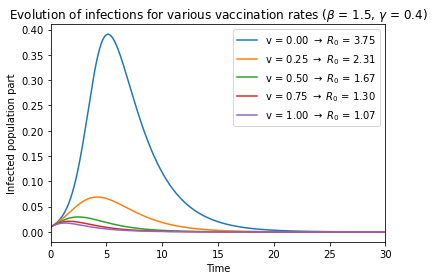

In [410]:
def sir_vaccination(initial, t, beta, gamma, v):
    '''
    SIR model with a vaccination term
    '''
    S = initial[0]
    I = initial[1]
    R = initial[2]

    dSdt = -(beta * I * S) - v * S
    dIdt = beta * I * S - gamma * I 
    dRdt = gamma * I + v * S

    return ([dSdt, dIdt, dRdt])


def naive_sir_vaccination_plot(beta, gamma, v):
    '''
    Plots for the SIR model with vaccination, for different inputs of the parameters.
    '''
    y = odeint(sir_vaccination, initial, t, args=(beta,gamma,v))
    R_0 = beta/(gamma + v)
    
    # SIR model plot
    plt.plot(t,y[:,0],'g-', label = 'S')
    plt.plot(t,y[:,1],'r-', label = 'I')
    plt.plot(t,y[:,2],'b-', label = 'R')
    plt.xlabel('Time')
    plt.ylabel('Population part')
    plt.text(30, 0.5, r'$R_{0} =$ %.2f' %(R_0), fontsize=14, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 8})
    plt.legend()
    
    if R_0 > 1:
        plt.title(r'SIR model for an epidemic with ($\beta$ = %.1f, $\gamma$ = %.1f, v = %.1f)' % (beta, gamma, v))
    else: 
        plt.title(r'SIR model for a non-epidemic with ($\beta$ = %.1f, $\gamma$ = %.1f, v = %.1f)' % (beta, gamma, v))
        plt.savefig('downloads/epidemicprevented')
    
    if v > 0:
        plt.savefig('downloads/basicvaccination.png')
    else: 
        plt.savefig('downloads/basicnovaccination.png')

    plt.show()


#     plots for an epidemic without and with vaccination
t = np.linspace(0, 50, num = 5000)
naive_sir_vaccination_plot(beta_fit, gamma_fit, 1.3)
# naive_sir_vaccination_plot(1.67, 0.45, 1.1)

#     plots for a non-epidemic without and with vaccination
naive_sir_vaccination_plot(0.8, 0.7, 0.5)

def infected_vaccination_rates(beta,gamma):
    '''
    Plots various I-curves for different vaccination rates
    '''
    for v in np.arange(0,1.1,0.25):
        y = odeint(sir_vaccination, initial, t, args=(beta,gamma,v))
        R_0 = beta/(gamma + v)
        plt.plot(t, y[:,1], label = r'v = %.2f $\rightarrow\ R_{0}$ = %.2f' %(v,R_0))
    
    plt.legend()
    plt.ylabel('Infected population part')
    plt.xlabel('Time')
    plt.title(r'Evolution of infections for various vaccination rates ($\beta$ = %.1f, $\gamma$ = %.1f)' %(beta,gamma))
    plt.xlim(0,30)
    plt.savefig('downloads/infectionsvaccine.png')
    plt.show()

infected_vaccination_rates(beta, gamma)
# infected_vaccination_rates(1,0.5)





# Problem 2 SIR with demography

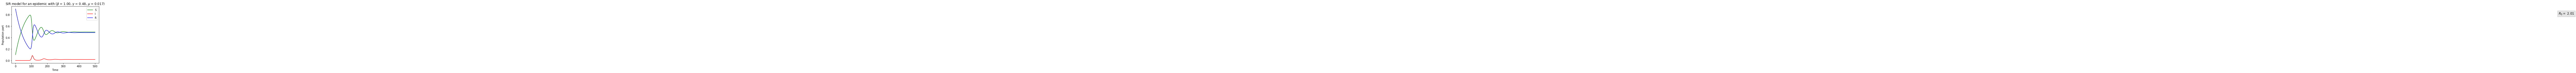

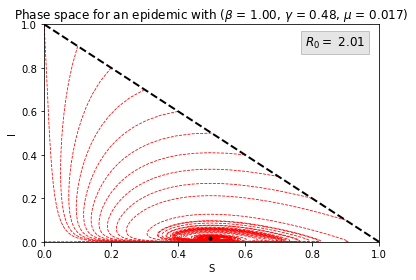

In [411]:
# New initial conditions. Times and rates expressed in years
S0 = 0.1
I0 = 0.0001
initial = [S0, I0, 1 - S0 - I0]
t = np.linspace(0, 25000, num =100000)
# t = np.linspace(0, 2500, num = 1000)

beta = 1
gamma = 1/2
mu= 1/60


def sir_demography(initial, t, beta, gamma, mu):
    '''
    SIR model with demography
    '''
    S = initial[0]
    I = initial[1]
    R = initial[2]

    dSdt = mu -(beta * I * S) - mu * S
    dIdt = beta * I * S - gamma * I - mu * I
    dRdt = gamma * I - mu * R

    return ([dSdt, dIdt, dRdt])

def sir_demography_plot(beta, gamma, mu):
    '''
    Plots SIR model with demography
    '''
    R_0 = beta/(gamma + mu)
    y = odeint(sir_demography, initial, t, args=(beta,gamma,mu))
#     y = odeint(sir_demography, [1/R0, (mu/beta) * (R_0 - 1), 1 - (1/R0) - ((mu/beta) * (R_0 - 1))], t, args=(beta,gamma,mu))

    plt.plot(t,y[:,0],'g-', label = 'S')
    plt.plot(t,y[:,1],'r-', label = 'I')
    plt.plot(t,y[:,2],'b-', label = 'R')
    plt.xlabel('Time')
    plt.ylabel('Population part')
    if R_0 > 1:
        plt.title(r'SIR model for an epidemic with ($\beta$ = %.2f, $\gamma$ = %.2f, $\mu$ = %.3f)' %(beta,gamma,mu))
    else:
        plt.title(r'SIR model for a non-epidemic with ($\beta$ = %.2f, $\gamma$ = %.2f, $\mu$ = %.3f)' %(beta,gamma,mu))
    plt.text(16000, 0.8, r'$R_{0} =$ %.2f' %(R_0), fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 4})
    plt.legend()
    plt.savefig('downloads/demographyendemic.png')
    plt.show()
    
#     plt.subplot(3,1,1)
#     plt.plot(t,y[:,0],'g-', label = 'S')
#     plt.ylabel('S')
#     plt.subplot(3,1,2)
#     plt.plot(t,y[:,1],'r-', label = 'I')
#     plt.ylabel('I')
#     plt.subplot(3,1,3)
#     plt.plot(t,y[:,2],'b-', label = 'R')
#     plt.ylabel('R')
#     plt.xlabel('time')
#     plt.savefig('downloads/SIRoscillations')
#     plt.show()
    

# sir_demography_plot(1/6,1/3,(1/(70*365)))
t = np.linspace(0, 500, num = 1000)
# sir_demography_plot(1.66,0.16,1/(70*365))
sir_demography_plot(1,0.48,1/60)
# sir_demography_plot(1.06,0.33,1/40)









def phase_space_demography(beta,gamma, mu):
    
    R_0 = beta/(gamma + mu)
    
    for S0 in np.arange(0,1,0.1):
        R0 = 0
        I0 = 1 - S0 - R0
        initial = [S0, I0, R0]
        y = odeint(sir_demography, initial, t, args=(beta,gamma,mu))
        plt.plot(y[:,0],y[:,1],'r--', linewidth = 0.8)
        I0 = 0.0001
        R0 = 1 - S0 - I0
        initial = [S0, I0, R0]
        y = odeint(sir_demography, initial, t, args=(beta,gamma,mu))
        plt.plot(y[:,0],y[:,1],'r--', linewidth = 0.8)
        if R_0 > 1:
            plt.plot(1/R_0, (mu/beta) * (R_0 - 1), 'o', color = 'black', markersize = 3, label = 'Fixed point')
#             plt.plot(y[:,0][0], y[:,1][0],'o', color = 'grey')
#             plt.plot(y[:,0][-1], y[:,1][-1],'o', color = 'grey')

        else:
            plt.plot(y[:,0][-1], y[:,1][-1],'o', color = 'grey')
    

    if R_0 > 1:
        plt.title(r'Phase space for an epidemic with ($\beta$ = %.2f, $\gamma$ = %.2f, $\mu$ = %.3f)' %(beta,gamma,mu))
    else:
        plt.title(r'Phase space for a non-epidemic with ($\beta$ = %.2f, $\gamma$ = %.2f, $\mu$ = %.3f)' %(beta,gamma,mu))
    
    plt.plot([0,1],[1,0],'--', color = 'black', linewidth = 2)
    plt.xlabel('S')
    plt.ylabel('I')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.text(0.78, 0.9, r'$R_{0} =$ %.2f' %(R_0), fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 4})
    plt.savefig('downloads/demographyphaseepi.png')
    plt.show()
    
t = np.linspace(0, 25000, num =100000)
phase_space_demography(beta,0.48,mu)
# phase_space_demography(beta_no_epi,gamma_no_epi,mu)


# t = np.linspace(0, 500, num = 1000)
# print(odeint(sir_demography, initial, t, args=(beta,gamma,mu)[:,1])
# fourier = fftpack.fft(odeint(sir_demography, initial, t, args=(beta,gamma,mu)[:,1]))
# frequency = fftpack.fftfreq(len(odeint(sir_demography, initial, t, args=(beta,gamma,mu)[:,1])))

# plt.plot(frequency,np.abs())





# Problem 2.1 Fourier

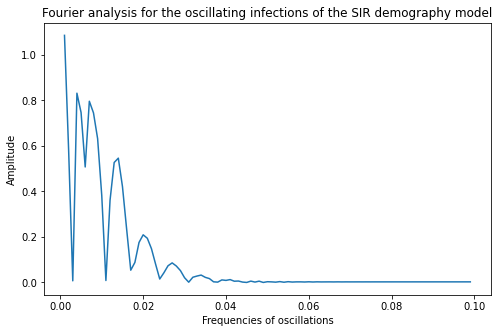

In [412]:
t = np.linspace(0, 500, num = 1000)
beta = 1
gamma = 0.7
mu = 1/70

y = odeint(sir_demography, initial, t, args=(beta,gamma,mu))
I = y[:,1]

fourier = fftpack.fft(I)
freqs = fftpack.fftfreq(len(I))

# sort frequencies & fourier together
freqs, fourier = zip(*sorted(zip(freqs, fourier)))
# index such to plot only positive frequencies
i_min = freqs.index(0) + 1
i_max = freqs.index(0.1)

plt.figure(figsize=(8,5))
# plot only indices of positive frequencies
plt.plot(freqs[i_min:i_max], np.abs(np.real(fourier))[i_min:i_max])
plt.title("Fourier analysis for the oscillating infections of the SIR demography model")
# plt.plot(freqs, fourier.real)
plt.xlabel('Frequencies of oscillations')
plt.ylabel('Amplitude')
plt.savefig('downloads/fourier.png')
plt.show()

# Problem 2.2 Infection Induced Mortality

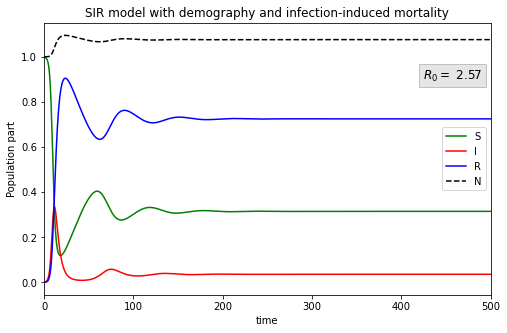

In [422]:
# New initial conditions
S0 = 1 - 0.001
I0 = 0.001
R0 = 0
N = 1

initial = [S0, I0, R0]
t = np.linspace(0, 500, num =100000)
# new paramater values
beta = 1
gamma = 1/3
mu= 1/60
v = 1/60
rho = 0.1



def sir_infection_mortality(initial, t, beta, gamma, mu, v, rho):
    '''
    SIR model with demography and infection-induced mortality
    '''
    S = initial[0]
    I = initial[1]
    R = initial[2]

    dSdt = v -(beta * I * S) - mu * S
    dIdt = beta * I * S - ((gamma + mu) * I*(1 - rho))
    dRdt = gamma * I - mu * R

    return ([dSdt, dIdt, dRdt])

R_0 = (beta * (1 - rho) * v)/((gamma + mu)*mu)
y = odeint(sir_infection_mortality, initial, t, args=(beta,gamma,mu,v,rho))

S = y[:,0]
I = y[:,1]
R = y[:,2]
N = []

for i in range(len(S)):
    n = S[i] + I[i] + R[i]
    N.append(n)

# Plot for the SIR model with demography and infection-induced mortality and a curve for N
plt.figure(figsize=(8,5))
plt.title('SIR model with demography and infection-induced mortality')
plt.plot(t,y[:,0],'g-', label = 'S')
plt.plot(t,y[:,1],'r-', label = 'I')
plt.plot(t,y[:,2],'b-', label = 'R')
plt.plot(t, N,'--', color = 'black', label = 'N')
plt.xlim(0,500)
plt.ylabel('Population part')
plt.xlabel('time')
plt.text(424, 0.9, r'$R_{0} =$ %.2f' %(R_0), fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 4})
plt.legend()
plt.savefig('downloads/infectionmortality.png')
plt.show()

# Problem 3 SEIR model

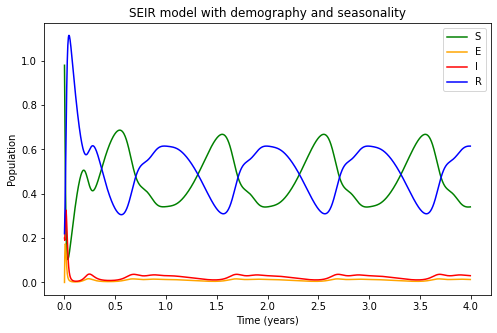

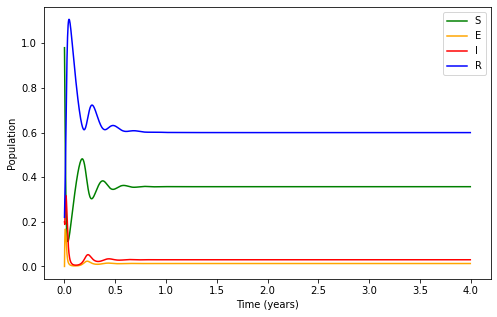

In [428]:
# Initial values
S0 = 0.98
E0 = 0
I0 = 0.2
R0 = 1 - (S0 - E0 - I0)
initial = [S0, E0, I0, R0]

# Parameters
gamma = 1/3
mu = 1/60
sigma = 1/8
beta0 = 0.8
beta1 = 0.3
omega = (np.pi * 2) / 365
t = np.arange(0,365*4,1)

def seir(initial, t, beta, gamma, mu, sigma):
    '''
    SEIR model
    '''
    S = initial[0]
    E = initial[1]
    I = initial[2]
    R = initial[3]
    
    dSdt = mu -(beta * I  + mu)* S
    dEdt = beta * S * I - (mu + sigma)*E
    dIdt = sigma * E - (mu + gamma)*I
    dRdt = gamma * I - mu * R

    return ([dSdt, dEdt, dIdt, dRdt])


def seir_seasonality(initial, t, beta0, beta1, omega, gamma, mu, sigma):
    '''
    SEIR model with varying beta (seasonality)
    '''
    S = initial[0]
    E = initial[1]
    I = initial[2]
    R = initial[3]
    
    beta = beta0 * (1 + beta1 * np.cos(omega * t))
    
    dSdt = mu -(beta * I  + mu)* S
    dEdt = beta * S * I - (mu + sigma)*E
    dIdt = sigma * E - (mu + gamma)*I
    dRdt = gamma * I - mu * R

    return ([dSdt, dEdt, dIdt, dRdt])

y = odeint(seir_seasonality, initial, t, args=(beta0, beta1, omega, gamma, mu, sigma))

# Plot for the SEIR model with seasonality
plt.figure(figsize=(8,5))
plt.title('SEIR model with demography and seasonality')
plt.plot(t/365,y[:,0],'g-', label = 'S')
plt.plot(t/365,y[:,1],'-', color = 'orange', label = 'E')
plt.plot(t/365,y[:,2],'r-', label = 'I')
plt.plot(t/365,y[:,3],'b-', label = 'R')
plt.ylabel('Population')
plt.xlabel('Time (years)')
# plt.text(400, 90, r'$R_{0} =$ %.2f' %(R_0), fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 4})

plt.legend()
plt.savefig('downloads/seasonality.png')
plt.show()


y = odeint(seir, initial, t, args=(beta,gamma,mu,sigma))

# Plot for the SEIR model without seasonality
plt.figure(figsize=(8,5))
plt.plot(t/365,y[:,0],'g-', label = 'S')
plt.plot(t/365,y[:,1],'-', color = 'orange', label = 'E')
plt.plot(t/365,y[:,2],'r-', label = 'I')
plt.plot(t/365,y[:,3],'b-', label = 'R')
plt.ylabel('Population')
plt.xlabel('Time (years)')
# plt.text(400, 90, r'$R_{0} =$ %.2f' %(R_0), fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 4})

plt.legend()
plt.savefig('downloads/seir')
plt.show()

